# Perceptron for Logic Gates

In [1]:
import math
import csv
import random
import matplotlib.pyplot as plt

Defining some required parameters

In [2]:
LEARNING_RATE = 0.001
EPOCH = 100000
ERROR_TOLERANCE = 0.0001

In [3]:

def h_function(w0, w1, w2, i1, i2):
    return w0 + (w1 * i1) + (w2 * i2)

def g_function(w0, w1, w2, i1, i2):
    h = h_function(w0, w1, w2, i1, i2)
    return float(1) / (1 + math.exp(-1 * h))

def calculate_error(target_output, actual_output):
    return math.pow((target_output - actual_output), 2)

def delta_w(g_result, input_value, target_output, learning_rate=0.001):
    return -1 * learning_rate * (g_result - target_output) * input_value


### Train

In [4]:
def train(data):
    #generate random weights 
    w0 = random.uniform(-0.2, 0.2)
    w1 = random.uniform(-0.2, 0.2)
    w2 = random.uniform(-0.2, 0.2)

    average_error = 100
    iteration = 0
    while iteration < EPOCH and average_error > ERROR_TOLERANCE:
        total_error = 0

        for row in data:
            x1 = float(row[0])
            x2 = float(row[1])
            target_output = float(row[2])

            g_result = g_function(w0, w1, w2, x1, x2)
            
            # calculate error
            error = calculate_error(target_output, g_result)
            total_error += error
            
            # update weights 
            w0 += delta_w(g_result, 1, target_output, LEARNING_RATE)
            w1 += delta_w(g_result, x1, target_output, LEARNING_RATE)
            w2 += delta_w(g_result, x2, target_output, LEARNING_RATE)
        
        # update epoch number
        iteration += 1
        average_error = float(total_error) / len(data)
        avg_error_plot.append(average_error)

    print("w0 is: " + str(w0) + "  w1 is: " + str(w1) + "    w2 is: " + str(w2))
    return {'w0': w0, 'w1': w1, 'w2': w2}

### Test

In [5]:
def test(test_data, weights):
    match = 0
    for test_case in test_data:
        test_input1 = float(test_case[0])
        test_input2 = float(test_case[1])
        expected_output = float(test_case[2])

        g_of_h = g_function(weights['w0'], weights['w1'], weights['w2'], test_input1, test_input2)
        
        if g_of_h <= 0.5:
            predicted_output = 0
        else:
            predicted_output = 1

        if expected_output == predicted_output:
            match += 1
            
        print(test_input1, test_input2, predicted_output)
    return float(match) / len(test_data) * 100

# AND Gate

 -------------------- AND GATE -------------------- 
[['0', '0', '0'], ['0', '1', '0'], ['1', '0', '0'], ['1', '1', '1']]
w0 is: -8.530394723360185  w1 is: 5.567258894341008    w2 is: 5.567197152484044


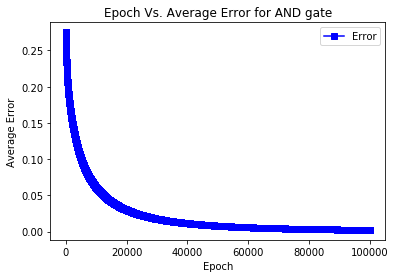

0.0 0.0 0
0.0 1.0 0
1.0 0.0 0
1.0 1.0 1

Accuracy % -  100.0


In [6]:
# AND gate validation:

print(" -------------------- AND GATE -------------------- ")
with open('./and.csv') as f:
    reader = csv.reader(f)
    and_data = list(reader)
#     for row in reader:
#         print(row)
    print(and_data)


avg_error_plot = []

and_weights = train(and_data)
plt.plot(avg_error_plot, marker='s', linestyle='-', color='b', label='Error')
plt.xlabel('Epoch')
plt.ylabel('Average Error')
plt.title('Epoch Vs. Average Error for AND gate')
plt.legend()
plt.show()


print("\nAccuracy % - ", test(and_data, and_weights))



# OR Gate

 -------------------- OR GATE -------------------- 
w0 is: -2.912229425680418  w1 is: 6.777669446608285    w2 is: 6.777240092083112


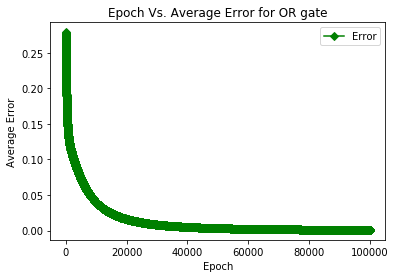

0.0 0.0 0
0.0 1.0 1
1.0 0.0 1
1.0 1.0 1

Accuracy % -  100.0


In [7]:
# OR gate validation:
print(" -------------------- OR GATE -------------------- ")

with open('./or.csv') as f:
    reader = csv.reader(f)
    or_data = list(reader)

avg_error_plot = []

or_weights = train(or_data)
plt.plot(avg_error_plot, marker='D', linestyle='-', color='g', label='Error')
plt.xlabel('Epoch')
plt.ylabel('Average Error')
plt.title('Epoch Vs. Average Error for OR gate')
plt.legend()
plt.show()

print("\nAccuracy % - ", test(or_data, or_weights))

# NAND Gate

 -------------------- NAND GATE -------------------- 
w0 is: 8.529341573453687  w1 is: -5.566554262856477    w2 is: -5.566491909144098


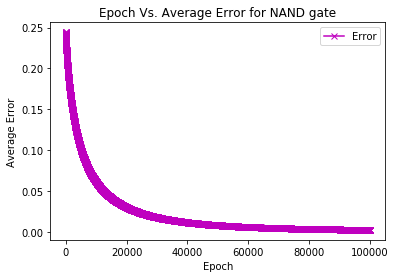

0.0 0.0 1
0.0 1.0 1
1.0 0.0 1
1.0 1.0 0

Accuracy % -  100.0


In [8]:
# NAND gate validation:
print(" -------------------- NAND GATE -------------------- ")

with open('./nand.csv') as f:
    reader = csv.reader(f)
    nand_data = list(reader)

avg_error_plot = []

nand_weights = train(nand_data)
plt.plot(avg_error_plot, marker='x', linestyle='-', color='m', label='Error')
plt.xlabel('Epoch')
plt.ylabel('Average Error')
plt.title('Epoch Vs. Average Error for NAND gate')
plt.legend()
plt.show()

print("\nAccuracy % - ", test(nand_data, nand_weights))

# NOR Gate

 -------------------- NOR GATE -------------------- 
w0 is: 2.9122246761629507  w1 is: -6.776900284656093    w2 is: -6.777991003926087


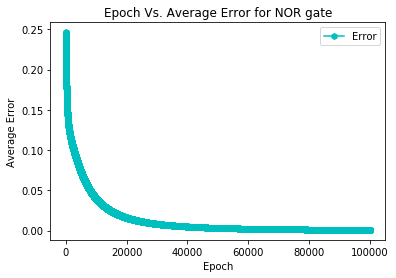

0.0 0.0 1
0.0 1.0 0
1.0 0.0 0
1.0 1.0 0

Accuracy % -  100.0


In [9]:

# NOR gate validation:
print(" -------------------- NOR GATE -------------------- ")

with open('./nor.csv') as f:
    reader = csv.reader(f)
    nor_data = list(reader)

avg_error_plot = []

nor_weights = train(nor_data)
plt.plot(avg_error_plot, marker='h', linestyle='-', color='c', label='Error')
plt.xlabel('Epoch')
plt.ylabel('Average Error')
plt.title('Epoch Vs. Average Error for NOR gate')
plt.legend()
plt.show()

print("\nAccuracy % - ", test(nor_data, nor_weights))


# XOR Gate
Here is to show that this perceptron **doesnt work** for XOR gate. If u see the accuracy it is only 25%. only one out of the four possible inputs is correct.

 -------------------- XOR GATE -------------------- 
w0 is: 2.9105886314187486  w1 is: -6.774515540713188    w2 is: -6.7739528955491854


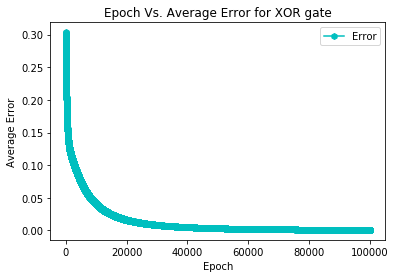

1.0 0.0 0
0.0 0.0 1
0.0 1.0 0
1.0 1.0 0

Accuracy % -  25.0


In [10]:
# XOR gate validation:
print(" -------------------- XOR GATE -------------------- ")

with open('./xor.csv') as f:
    reader = csv.reader(f)
    xor_data = list(reader)

avg_error_plot = []

xor_weights = train(nor_data)
plt.plot(avg_error_plot, marker='h', linestyle='-', color='c', label='Error')
plt.xlabel('Epoch')
plt.ylabel('Average Error')
plt.title('Epoch Vs. Average Error for XOR gate')
plt.legend()
plt.show()

print("\nAccuracy % - ", test(xor_data, xor_weights))
